In [44]:
!python -V

Python 3.7.13


In [45]:
%pip install rich
%pip install torch-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
import sys
sys.path.append('/content/gdrive/MyDrive/code-switch/code')

In [48]:
%cd /content/gdrive/MyDrive/code-switch/code

/content/gdrive/MyDrive/code-switch/code


In [49]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device == torch.device('cuda'):
  !nvidia-smi

Tue Jul 19 12:40:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    25W /  70W |    630MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from data import Data, train_loader, test_loader
from config import CFG
from utils import *
from char2vec import BiLSTMtagger

from tqdm import tqdm
from rich import print
from rich.progress import track
from datetime import datetime

from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

torch.manual_seed(CFG.seed)

In [51]:
CFG.n_epochs = 100 

EMBEDDING_DIM = CFG.out_ch2
HIDDEN_DIM = 128
TAGSET_SIZE = Data.label_vocab_size # en, es, other

Output()

Epoch   0/100, loss=0.0000, val_loss=1.3860 ,f1=nan, val_f1=0.2362 ,acc=nan, val_acc=0.2461

Output()

Output()

Epoch   1/100, loss=0.5181, val_loss=0.3564 ,f1=0.5508, val_f1=0.6209 ,acc=0.7619, val_acc=0.8186

Output()

Output()

Epoch   2/100, loss=0.2886, val_loss=0.3097 ,f1=0.6953, val_f1=0.6732 ,acc=0.8643, val_acc=0.8439

Output()

Output()

Epoch   3/100, loss=0.2262, val_loss=0.2187 ,f1=0.7974, val_f1=0.8090 ,acc=0.9040, val_acc=0.9129

Output()

Output()

Epoch   4/100, loss=0.1756, val_loss=0.2056 ,f1=0.8396, val_f1=0.8082 ,acc=0.9254, val_acc=0.9118

Output()

Output()

Epoch   5/100, loss=0.1553, val_loss=0.1820 ,f1=0.8532, val_f1=0.8292 ,acc=0.9325, val_acc=0.9247

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  10/100, loss=0.1143, val_loss=0.1481 ,f1=0.8809, val_f1=0.8533 ,acc=0.9467, val_acc=0.9351

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  20/100, loss=0.0927, val_loss=0.1230 ,f1=0.8971, val_f1=0.8704 ,acc=0.9546, val_acc=0.9432

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  30/100, loss=0.0851, val_loss=0.1231 ,f1=0.9024, val_f1=0.8707 ,acc=0.9569, val_acc=0.9433

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  40/100, loss=0.0784, val_loss=0.1155 ,f1=0.9074, val_f1=0.8766 ,acc=0.9593, val_acc=0.9460

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  50/100, loss=0.0735, val_loss=0.1139 ,f1=0.9115, val_f1=0.8829 ,acc=0.9608, val_acc=0.9483

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  60/100, loss=0.0656, val_loss=0.1004 ,f1=0.9305, val_f1=0.9117 ,acc=0.9679, val_acc=0.9595

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  70/100, loss=0.0610, val_loss=0.0985 ,f1=0.9344, val_f1=0.9165 ,acc=0.9696, val_acc=0.9617

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  80/100, loss=0.0564, val_loss=0.0909 ,f1=0.9377, val_f1=0.9185 ,acc=0.9713, val_acc=0.9628

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch  90/100, loss=0.0542, val_loss=0.0921 ,f1=0.9391, val_f1=0.9244 ,acc=0.9720, val_acc=0.9651

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Epoch 100/100, loss=0.0521, val_loss=0.0921 ,f1=0.9413, val_f1=0.9215 ,acc=0.9730, val_acc=0.9639

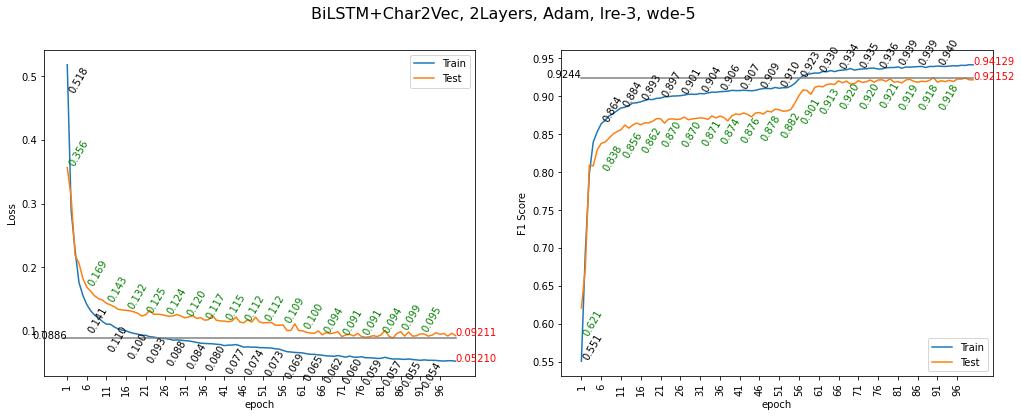

In [52]:


model = BiLSTMtagger(EMBEDDING_DIM, HIDDEN_DIM, TAGSET_SIZE).to(device)
loss_function = nn.CrossEntropyLoss()#nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=CFG.lr)
optimizer = optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=150, factor=0.1, min_lr=1e-8)

logs = defaultdict(list)

best_val_score = 0
for epoch in (range(CFG.n_epochs+1)):

    model.train()  # again, normally you would NOT do 300 epochs, it is toy data
    avg_loss = 0
    train_targets, train_preds = [], []
    if epoch!=0:
        for sentence, label in track(train_loader,
                    description="Training...", total=len(train_loader), transient=True):

            sentence, label = sentence.to(device), label.to(device)
            model.zero_grad()
            scores = model(sentence)
            loss = loss_function(scores.view(-1,scores.shape[-1]), label.view(-1))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()/len(train_loader)
            train_targets.extend(flatten(label))
            train_preds.extend(flatten(scores.argmax(axis=-1)))

    model.eval()
    avg_val_loss = 0
    val_targets, val_preds = [], []
    for sentence, label in track(test_loader,
                description="Validating...", total=len(test_loader), transient=True):
        sentence, label = sentence.to(device), label.to(device)
        scores = model(sentence)
        avg_val_loss += loss_function(scores.view(-1,scores.shape[-1]), label.view(-1)).item()/len(test_loader)
        label = label.view(-1).detach().cpu().numpy()
        val_targets.extend(label)
        val_preds.extend(flatten(scores.argmax(axis=-1)))

    scheduler.step(avg_val_loss)

    #Calculate F1-score, accuracy_score
    train_eval = evaluation(train_targets, train_preds, metrics=['f1', 'accuracy'])
    val_eval   = evaluation(val_targets,   val_preds,   metrics=['f1', 'accuracy'])

    if epoch<=5 or epoch%10==0:
        width = len(str(CFG.n_epochs))
        print(f"Epoch {epoch:{width}}/{CFG.n_epochs}, loss={avg_loss:.4f}, val_loss={avg_val_loss:.4f}\
 ,f1={train_eval['f1']:.4f}, val_f1={val_eval['f1']:.4f}\
 ,acc={train_eval['accuracy']:.4f}, val_acc={val_eval['accuracy']:.4f}")
        
    if epoch!=0:
        logs['train_loss'].append(avg_loss)
        logs['val_loss'].append(avg_val_loss)
        logs['train_f1'].append(train_eval['f1'])
        logs['val_f1'].append(val_eval['f1'])
        logs['train_accuracy'].append(train_eval['accuracy'])
        logs['val_accuracy'].append(val_eval['accuracy'])
    # saving the best model
    if best_val_score < val_eval['f1']:
        best_val_score = val_eval['f1']
        best_model = model

torch.save(best_model.state_dict(), f'../saved-models/model-[{datetime.now().strftime("%y%m%d%H%M")}]{max(logs["val_f1"]):.5f}.pth'.replace('0.','.'))
torch.save(best_model.state_dict(), '../saved-models/bestmodel.pth')

res_plot(logs, desc="BiLSTM+Char2Vec, 2Layers, Adam, lre-3, wde-5", p=5)


# Prediction

In [57]:
import torch

from config import CFG
from data import Data
from char2vec import BiLSTMtagger

EMBEDDING_DIM = CFG.out_ch2
HIDDEN_DIM = 128
TAGSET_SIZE = Data.label_vocab_size # pad, en, es, other

def predict(text):
    model = BiLSTMtagger(EMBEDDING_DIM, HIDDEN_DIM, TAGSET_SIZE)
    state = torch.load('../saved-models/bestmodel.pth')
    model.load_state_dict(state)  
    model.eval()
    tokens = text.split()
    x = Data.embedding_s(Data.chr2id, [tokens+['.']])
    out = model(torch.LongTensor(x)).argmax(dim=-1)[0].tolist()
    labels = [Data.id2lbl[i] for i in out]

    return labels[:-1]

texts = ["@andres_romero17 si , prometo hacer un audio :)", "This is an audio book !",
         "@andres98 love his laptoooop soooooo much , si si  :)", 
        "Sit there & let me write it doooown ."]
for text in texts:
    print(predict(text))

['en', 'es', 'other', 'es', 'es', 'es', 'es', 'other']

['es', 'en', 'en', 'en', 'en', 'other']

['other', 'en', 'en', 'en', 'en', 'en', 'other', 'es', 'es', 'other']

['es', 'en', 'other', 'en', 'en', 'en', 'en', 'en', 'other']

In [54]:
best_model

BiLSTMtagger(
  (word_embeddings): Char2Vec(
    (embeds): Embedding(300, 9, padding_idx=0)
    (conv1): Sequential(
      (0): Conv1d(9, 21, kernel_size=(3,), stride=(1,))
      (1): ReLU()
      (2): Dropout(p=0.1, inplace=False)
    )
    (convs2): ModuleList(
      (0): Sequential(
        (0): Conv1d(21, 5, kernel_size=(3,), stride=(1,))
        (1): ReLU()
      )
      (1): Sequential(
        (0): Conv1d(21, 5, kernel_size=(4,), stride=(1,))
        (1): ReLU()
      )
      (2): Sequential(
        (0): Conv1d(21, 5, kernel_size=(5,), stride=(1,))
        (1): ReLU()
      )
    )
    (linear): Sequential(
      (0): Linear(in_features=15, out_features=15, bias=True)
      (1): ReLU()
    )
  )
  (lstm): LSTM(15, 128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (hidden2tag): Linear(in_features=256, out_features=4, bias=True)
)

In [55]:
from torchsummary import summary
best_model = BiLSTMtagger(EMBEDDING_DIM, HIDDEN_DIM, TAGSET_SIZE)
state = torch.load('../saved-models/bestmodel.pth')
best_model.load_state_dict(state)
summary(best_model, verbose=False)

Layer (type:depth-idx)                   Param #
├─Char2Vec: 1-1                          --
|    └─Embedding: 2-1                    2,700
|    └─Sequential: 2-2                   --
|    |    └─Conv1d: 3-1                  588
|    |    └─ReLU: 3-2                    --
|    |    └─Dropout: 3-3                 --
|    └─ModuleList: 2-3                   --
|    |    └─Sequential: 3-4              320
|    |    └─Sequential: 3-5              425
|    |    └─Sequential: 3-6              530
|    └─Sequential: 2-4                   --
|    |    └─Linear: 3-7                  240
|    |    └─ReLU: 3-8                    --
├─LSTM: 1-2                              543,744
├─Linear: 1-3                            1,028
Total params: 549,575
Trainable params: 549,575
Non-trainable params: 0